# Proyecto integrador 1
## Proyecto de analisis de imagenes
## Integrantes:

   - Juliana Ochoa Ramirez
   - Javier Arturo Rozo Alzate
   - Mateo Graciano
   - Cristian David Muñoz Mora
   - Juan Mauricio Cuscagua López
 

## Librerias usadas en el proyecto y funciones creadas utiles

In [2]:
import cv2 # Lee las imagenes jpg
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from skimage.measure import  compare_ssim
from collections import Counter
import pandas as pd


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ['faces','outliers']#classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)


# Lectura y preprocesamiento de datos

In [3]:
#List all image files
import glob
image_list = []
base1='input/faces94/*'
male=[]
female=[]
n_im=0
for root1 in glob.glob(base1):
    base2=root1+'/*'
    for (root2) in glob.glob(base2):
        base3=root2+'/*.jpg'
        for (root3) in glob.glob(base3):
            image_list.append(root3)
            if('/male/'in root3):
                male.append(n_im)
            if('/female/'in root3):
                female.append(n_im)
            if('/malestaff/'in root3):
                male.append(n_im)
            n_im+=1

# Make a whole matrix with all dataset 180x180*num_images
data_set=np.zeros((len(image_list),180,180))
data_set_vec=np.zeros((180*180,len(image_list)))
for image in range(len(image_list)):
    data_set[image,:,:]=cv2.cvtColor(cv2.resize(cv2.imread(image_list[image]),(180, 180)),cv2.COLOR_BGR2GRAY)
    data_set_vec[:,image]=np.reshape(data_set[image,:,:], (-1))
outlier_list = []
base1='input/Outliers/*'
for root1 in glob.glob(base1):
    outlier_list.append(root1)
    
data_set_out=np.zeros((len(outlier_list),180,180))
data_set_out_vec=np.zeros((180*180,len(outlier_list)))
for image in range(len(outlier_list)):
    data_set_out[image,:,:]=cv2.cvtColor(cv2.resize(cv2.imread(outlier_list[image]),(180, 180)),cv2.COLOR_BGR2GRAY)
    data_set_out_vec[:,image]=np.reshape(data_set_out[image,:,:], (-1))


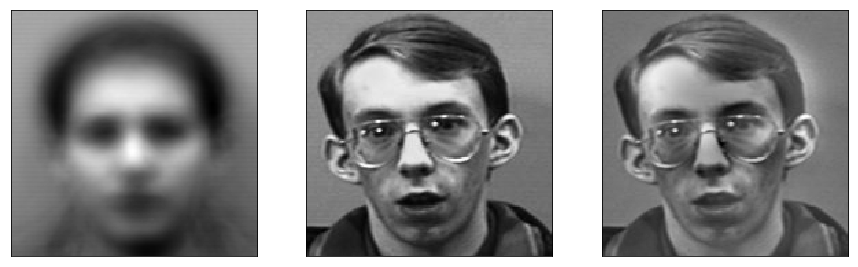

In [4]:
plt.rcParams['figure.figsize'] = [15,5]
data_set_vec_mean=np.reshape(np.mean(data_set_vec,axis=1),(-1,1))
data_no_mean=data_set_vec-data_set_vec_mean
fig, axs = plt.subplots(nrows=1, ncols=3)
axs[0].imshow(np.reshape(data_set_vec_mean,(180,180)), cmap = plt.cm.gray)
axs[0].tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')

axs[1].imshow(np.reshape(data_set_vec[:,2500],(180,180)), cmap = plt.cm.gray)
axs[1].tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')

axs[2].imshow(np.reshape(data_no_mean[:,2500],(180,180)), cmap = plt.cm.gray)
axs[2].tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')


## Calculando los eigenvectors y values de $AA^{T}$

In [5]:
matrix_trick=np.dot(data_no_mean.transpose(),data_no_mean)

#eigenvalues, eigenvectors, = np.linalg.eig(matrix_trick)

eigenvectors, eigenvalues, eigenvectors = np.linalg.svd(matrix_trick)

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

#Sort the eigen pairs in descending order:
#eig_pairs.sort()
#eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
#eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Varianza explicada en función de eigenvectors escogidos

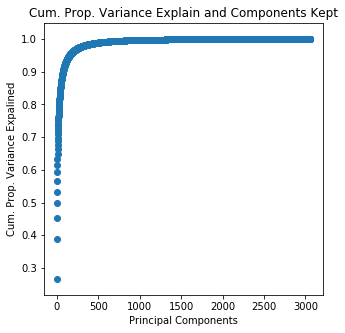

In [6]:

plt.rcParams['figure.figsize'] = [5,5]
var_comp_sum = np.cumsum(eigenvalues)/sum(eigenvalues);

num_comp = range(1,len(eigenvalues)+1);
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

# Sin Outliers

In [7]:
data_set_vec=np.append(data_set_vec,data_set_vec,axis=1)
data_set_vec_mean=np.reshape(np.mean(data_set_vec,axis=1),(-1,1))
data_no_mean=data_set_vec-data_set_vec_mean

matrix_trick=np.dot(data_no_mean.transpose(),data_no_mean)

eigenvectors, eigenvalues, eigenvectors = np.linalg.svd(matrix_trick)

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
#eig_pairs.sort(reverse=True)
#eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
#eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

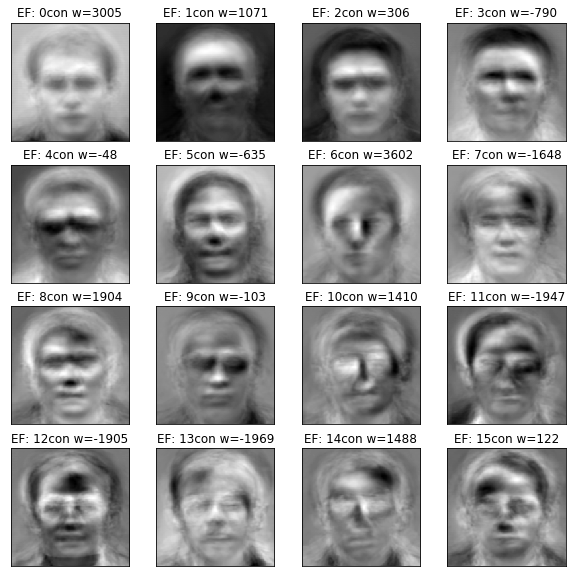

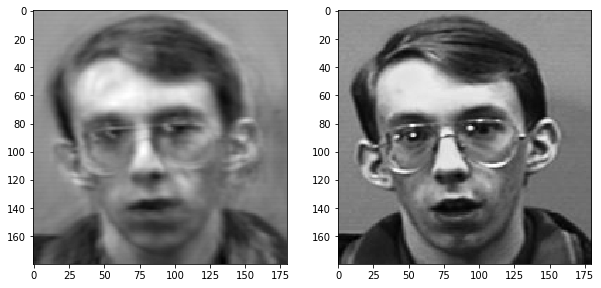

In [13]:
reduced_eig = np.array(eigenvectors[:100]).transpose()
eig_face = np.dot(data_no_mean,reduced_eig)
eig_face = eig_face.transpose()

for i in range(eig_face.shape[0]):
    eig_face[i,:]=eig_face[i,:]/np.linalg.norm(eig_face[i,:],ord=None)

W=np.dot(eig_face,data_no_mean)



plt.rcParams['figure.figsize'] = [10,10]

foto=2500
foto_rec=data_set_vec_mean.copy()

fig, axs = plt.subplots(nrows=4, ncols=4)
for i in range(eig_face.shape[0]):
    foto_rec+=W[i,foto]*np.reshape(eig_face[i,:],foto_rec.shape)
    f=int(i/4)
    c=i%4
    if (i<16):
        axs[f,c].imshow(np.reshape(eig_face[i,:],(180,180)), cmap = plt.cm.gray) #check
        axs[f,c].set_title('EF: '+str(i)+'con w='+str(int(W[i,foto])))
        axs[f,c].tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.show();


plt.rcParams['figure.figsize'] = [10,10]

fig, axs = plt.subplots(nrows=1, ncols=2)

axs[0].imshow(np.reshape(foto_rec,(180,180)), cmap = plt.cm.gray)
axs[1].imshow(np.reshape(data_set_vec[:,foto],(180,180)), cmap = plt.cm.gray)
plt.show();

C:\Users\Juliana\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


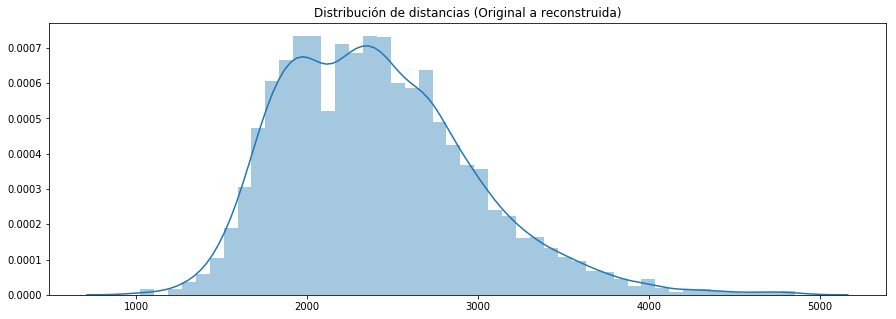

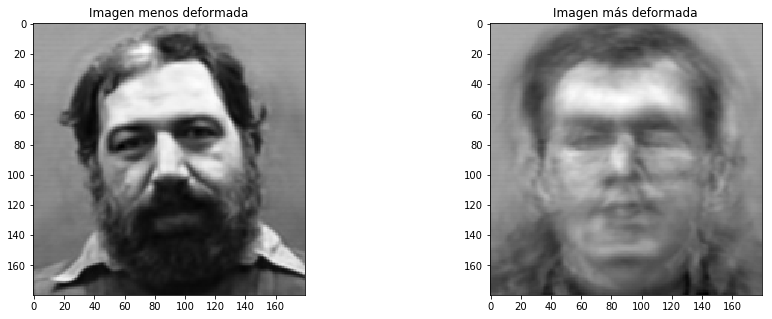

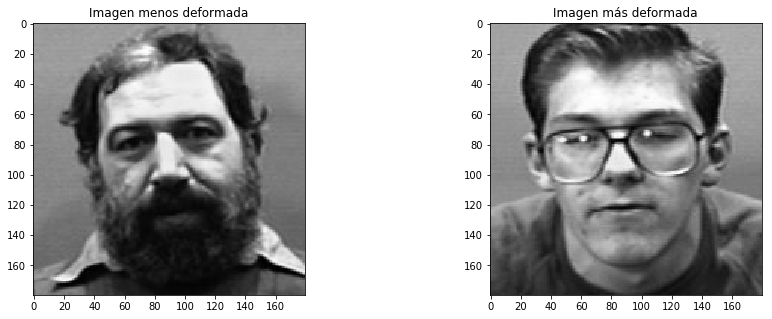

In [80]:

dist=[]
for foto in range(data_set_vec.shape[1]):
    aux=data_set_vec[:,foto]-data_set_rec[:,foto]
    dist.append(np.linalg.norm(aux,ord=None))
    
    
sns.distplot(dist)
plt.title('Distribución de distancias (Original a reconstruida)')
plt.show()

orden=np.argsort(np.array(dist));

fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(np.reshape(data_set_rec[:,orden[0]],(180,180)), cmap = plt.cm.gray) #check
axs[0].set_title('Imagen menos deformada')
#plt.show()

axs[1].imshow(np.reshape(data_set_rec[:,orden[-1]],(180,180)), cmap = plt.cm.gray) #check
axs[1].set_title('Imagen más deformada')
plt.show();


fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(np.reshape(data_set_vec[:,orden[0]],(180,180)), cmap = plt.cm.gray) #check
axs[0].set_title('Imagen menos deformada')
#plt.show()

axs[1].imshow(np.reshape(data_set_vec[:,orden[-1]],(180,180)), cmap = plt.cm.gray) #check
axs[1].set_title('Imagen más deformada')
plt.show();


# K-Means

In [50]:
W.shape

(100, 6118)

In [51]:
kmeans= KMeans(n_clusters=4, random_state=0).fit(W.transpose())

In [52]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
wcentro=kmeans.cluster_centers_
wcentro.shape

(4, 100)

In [78]:
C1=np.dot(kmeans.cluster_centers_[0],eig_face) 
C2=np.dot(kmeans.cluster_centers_[1],eig_face) 
C3=np.dot(kmeans.cluster_centers_[2],eig_face) 
C4=np.dot(kmeans.cluster_centers_[3],eig_face) 

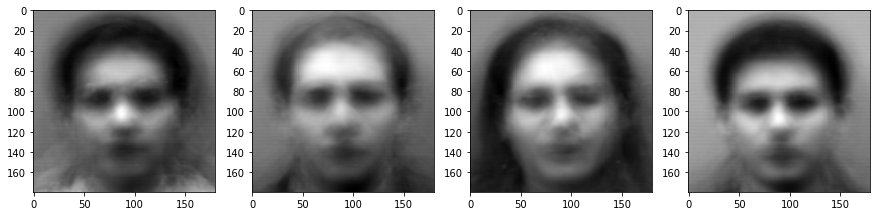

In [79]:
plt.rcParams['figure.figsize'] = [15,5]
fig, axs = plt.subplots(nrows=1, ncols=4)

axs[0].imshow(np.reshape(C1 + media,(180,180)), cmap = plt.cm.gray)
axs[1].imshow(np.reshape(C2 + media,(180,180)), cmap = plt.cm.gray)
axs[2].imshow(np.reshape(C3 + media,(180,180)), cmap = plt.cm.gray)
axs[3].imshow(np.reshape(C4 + media,(180,180)), cmap = plt.cm.gray)

plt.show();


In [75]:
ylabel=kmeans.labels_
Distances=kmeans.transform(W.transpose())
WdistCentr=np.amin(Distances, axis=1)
ordenDis=np.argsort(WdistCentr)

In [76]:
Resultado={'Clase Distancias':WdistCentr,'label':ylabel}
df = pd.DataFrame(Resultado)
df.sort_values('Clase Distancias', axis = 0, ascending = True, inplace = True, na_position ='first') 

### Clase 1

(702,)


C:\Users\Juliana\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


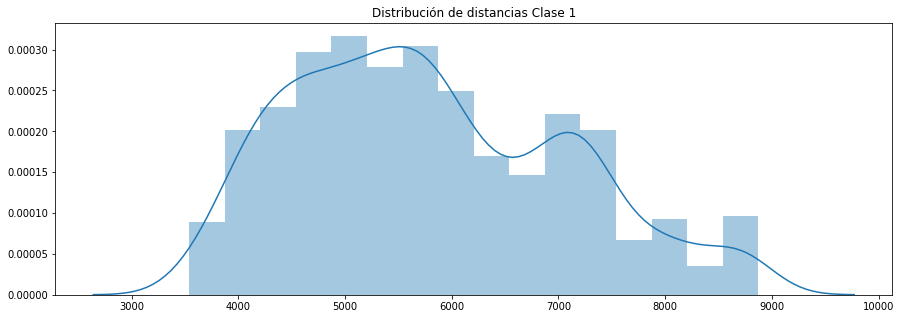

In [58]:
print(WdistCentr[ylabel==2].shape)
sns.distplot(WdistCentr[ylabel==0])
plt.title('Distribución de distancias Clase 1')
plt.show();

In [59]:
df1=df.loc[df[df.columns[1]]==0]    
df1.head()

,Clase Distancias,label
2059,3537.176986,0
5118,3537.176986,0
2072,3544.712127,0
5131,3544.712127,0
5133,3554.487976,0


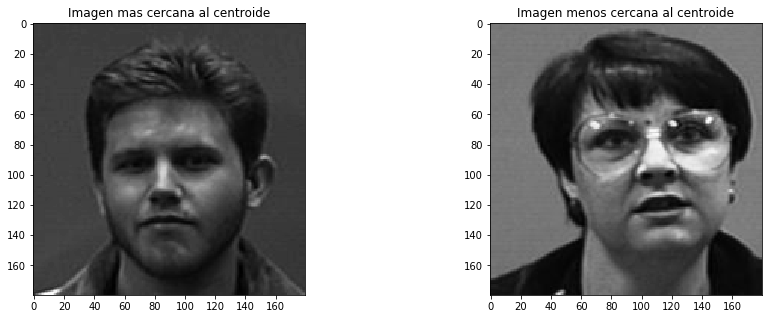

In [60]:
#menor y mayor distancias
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(np.reshape(data_set_vec[:,df1.index[0]],(180,180)), cmap = plt.cm.gray) #check
axs[0].set_title('Imagen mas cercana al centroide')
#plt.show()

axs[1].imshow(np.reshape(data_set_vec[:,df1.index[-1]],(180,180)), cmap = plt.cm.gray) #check
axs[1].set_title('Imagen menos cercana al centroide')
plt.show();

### Clase 2

(702,)


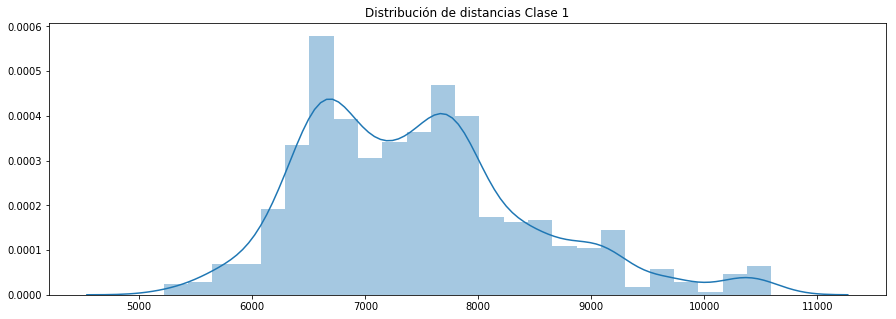

In [61]:
print(WdistCentr[ylabel==2].shape)
sns.distplot(WdistCentr[ylabel==1])
plt.title('Distribución de distancias Clase 1')
plt.show();

In [62]:
df1=df.loc[df[df.columns[1]]==1]    
df1.head()

,Clase Distancias,label
6092,5215.130246,1
3033,5215.130246,1
3024,5331.188850,1
6083,5331.188850,1
6093,5335.142347,1


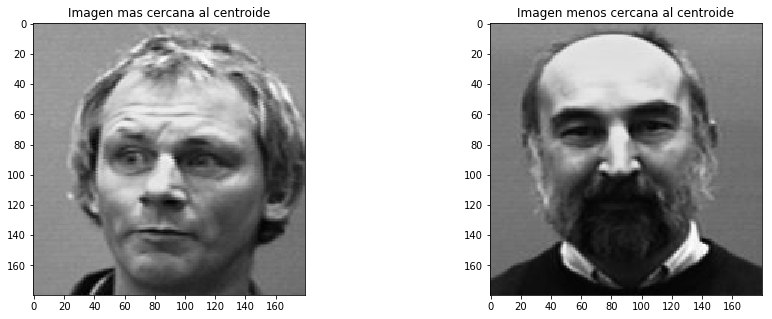

In [63]:
#menor y mayor distancias
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(np.reshape(data_set_vec[:,df1.index[0]],(180,180)), cmap = plt.cm.gray) #check
axs[0].set_title('Imagen mas cercana al centroide')
#plt.show()

axs[1].imshow(np.reshape(data_set_vec[:,df1.index[-1]],(180,180)), cmap = plt.cm.gray) #check
axs[1].set_title('Imagen menos cercana al centroide')
plt.show();

### Clase 3

(702,)


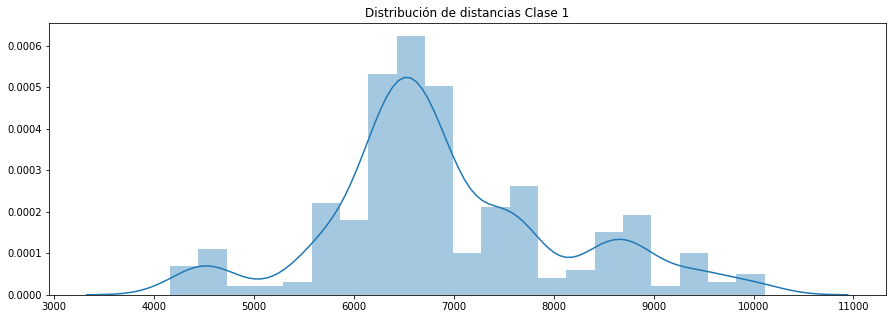

In [64]:
print(WdistCentr[ylabel==2].shape)

sns.distplot(WdistCentr[ylabel==2])
plt.title('Distribución de distancias Clase 1')
plt.show();

In [65]:
df1=df.loc[df[df.columns[1]]==2]    
df1.head()

,Clase Distancias,label
1781,4159.814808,2
4840,4159.814808,2
4841,4160.339029,2
1782,4160.339029,2
4851,4328.937463,2


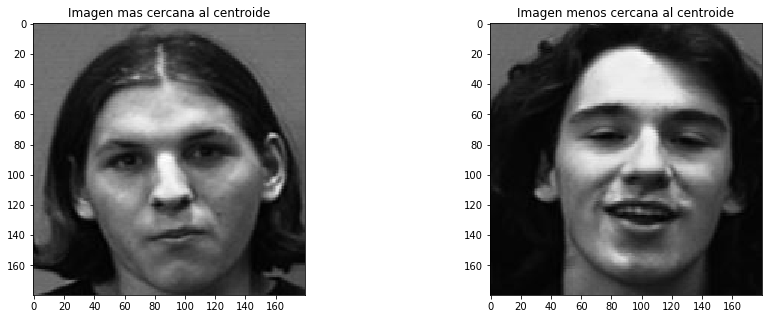

In [66]:
#menor y mayor distancias
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(np.reshape(data_set_vec[:,df1.index[0]],(180,180)), cmap = plt.cm.gray) #check
axs[0].set_title('Imagen mas cercana al centroide')
#plt.show()

axs[1].imshow(np.reshape(data_set_vec[:,df1.index[-1]],(180,180)), cmap = plt.cm.gray) #check
axs[1].set_title('Imagen menos cercana al centroide')
plt.show();

### Clase 4

(702,)


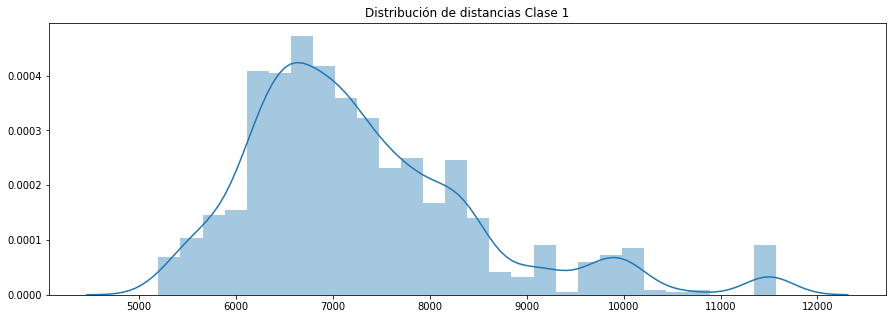

In [67]:
print(WdistCentr[ylabel==2].shape)
sns.distplot(WdistCentr[ylabel==3])
plt.title('Distribución de distancias Clase 1')
plt.show();

In [68]:
df1=df.loc[df[df.columns[1]]==3]    
df1.head()

,Clase Distancias,label
3798,5199.905081,3
739,5199.905081,3
5015,5233.301213,3
1956,5233.301213,3
740,5244.523947,3


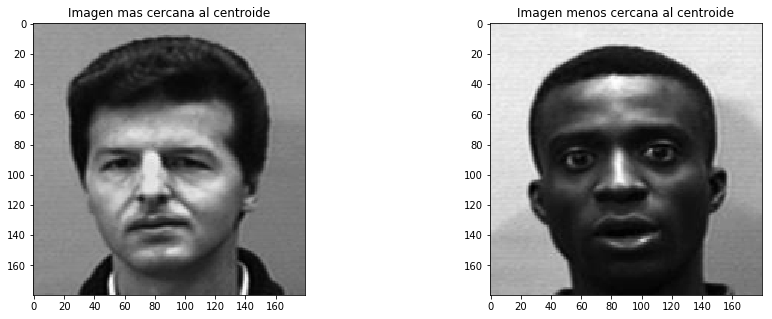

In [69]:
#menor y mayor distancias
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].imshow(np.reshape(data_set_vec[:,df1.index[0]],(180,180)), cmap = plt.cm.gray) #check
axs[0].set_title('Imagen mas cercana al centroide')
#plt.show()

axs[1].imshow(np.reshape(data_set_vec[:,df1.index[-1]],(180,180)), cmap = plt.cm.gray) #check
axs[1].set_title('Imagen menos cercana al centroide')
plt.show();